In [1]:
from analysis.FultonMarketAnalysis import FultonMarketAnalysis
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pymbar.timeseries import detect_equilibration
import os
import netCDF4 as nc

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



7OH_0
10/18/2024 10:21:04 // Found storage directory at /expanse/lustre/projects/iit119/dcooper/MOR/replica_exchange/7OH_0/saved_variables
10/18/2024 10:21:06 // Shapes of temperature arrays: [(0, (101,)), (1, (101,)), (2, (101,)), (3, (101,)), (4, (101,)), (5, (101,)), (6, (101,)), (7, (101,)), (8, (101,)), (9, (101,)), (10, (101,)), (11, (101,)), (12, (101,)), (13, (101,)), (14, (101,)), (15, (101,)), (16, (101,)), (17, (101,)), (18, (101,)), (19, (101,))]
10/18/2024 10:21:26 // Detected interpolations at: [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
10/18/2024 10:21:28 // Shape of final energies determined to be: (9835, 101, 101)
10/18/2024 10:21:50 // Equilibration detected at 414.1 ns



******* JAX 64-bit mode is now on! *******
*     JAX is now set to 64-bit mode!     *
*   This MAY cause problems with other   *
*      uses of JAX in the same code.     *
******************************************



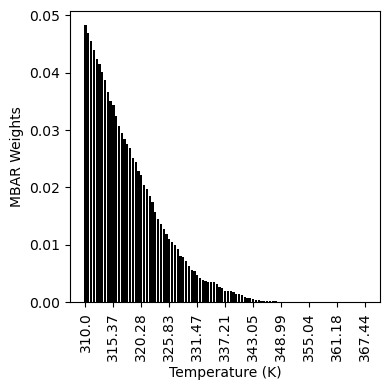

In [2]:
# Input
sims = ['7OH_0', '7u2k_4', '7u2l_4', 'buprenorphine_0', 'c11guano_1', 'c3guano_1', 'c7guano_1', 'c9guano_1', 'carfentanil_0', 'dynorphin_0', 'LeuEnk_0', 'MetEnk_0', 'oxycodone_0', 'pentazocine_0']
repexchange_dir = '/expanse/lustre/projects/iit119/dcooper/MOR/replica_exchange/'
pdb_dir = '/expanse/lustre/projects/iit119/dcooper/MOR/equil/output/'
output_dir = '/expanse/lustre/projects/iit119/dcooper/MOR/final/resampled/'
intracellular_resids = [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349]

for sim in sims:
    # Sim input
    print(sim)
    dir = os.path.join(repexchange_dir, sim)
    pdb = os.path.join(pdb_dir, sim.split('_')[0] + '.pdb')

    
    # Make obj
    analysis = FultonMarketAnalysis(dir, pdb, skip=10, resids=intracellular_resids)
    
    # Importance Resampling
    analysis.importance_resampling()
    analysis.plot_weights()
    analysis.write_resampled_traj('test.pdb', 'test.dcd')
    break